In [ ]:
import os 
import sys 
import urllib.request 
import pandas as pd
import json

client_id = "n3c5eOK1b5NsdDInuOM0" 
client_secret = "omwrqqdje4"

url = "https://openapi.naver.com/v1/datalab/search";

body = "{\"startDate\":\"2020-01-01\",\"endDate\":\"2020-12-31\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"더위사냥\",\"keywords\":[\"더위사냥\"]}]}";


# body = str(body) # str형으로 줘야 encode 함수 사용가능

request = urllib.request.Request(url) 
request.add_header("X-Naver-Client-Id",client_id) 
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json") 
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode() 

if(rescode==200): 
  response_body = response.read() 
  print(response_body.decode('utf-8')) 
else: 
  print("Error Code:" + rescode) 

data = json.loads(response_body)

res = data['results'][0]['data'] 
res = pd.DataFrame(res)
res

{"startDate":"2020-01-01","endDate":"2020-12-31","timeUnit":"date","results":[{"title":"더위사냥","keywords":["더위사냥"],"data":[{"period":"2020-01-01","ratio":10.29411},{"period":"2020-01-02","ratio":9.31372},{"period":"2020-01-03","ratio":8.08823},{"period":"2020-01-04","ratio":10.78431},{"period":"2020-01-05","ratio":8.82352},{"period":"2020-01-06","ratio":11.5196},{"period":"2020-01-07","ratio":8.08823},{"period":"2020-01-08","ratio":12.2549},{"period":"2020-01-09","ratio":12.0098},{"period":"2020-01-10","ratio":9.06862},{"period":"2020-01-11","ratio":9.06862},{"period":"2020-01-12","ratio":9.80392},{"period":"2020-01-13","ratio":8.82352},{"period":"2020-01-14","ratio":11.02941},{"period":"2020-01-15","ratio":7.10784},{"period":"2020-01-16","ratio":7.84313},{"period":"2020-01-17","ratio":7.35294},{"period":"2020-01-18","ratio":11.5196},{"period":"2020-01-19","ratio":10.04901},{"period":"2020-01-20","ratio":12.99019},{"period":"2020-01-21","ratio":11.7647},{"period":"2020-01-22","ratio":8.

,period,ratio
0,2020-01-01,10.29411
1,2020-01-02,9.31372
2,2020-01-03,8.08823
3,2020-01-04,10.78431
4,2020-01-05,8.82352
...,...,...
361,2020-12-27,13.72549
362,2020-12-28,10.78431
363,2020-12-29,9.80392
364,2020-12-30,12.74509


In [ ]:
# data['results'][0] # dict

In [ ]:
tt = str(data['results'][0]['keywords'][0])
tt

'더위사냥'

In [ ]:
strtodate=[]

In [ ]:
for i in res['period'] :
  strtodate.append(i[5:])
strtodate[:5]
len(strtodate)

366

In [ ]:
j = 0
for i in data['results'][0]['data'] :
  i['period'] = strtodate[j]
  j += 1

In [ ]:
res = data['results'][0]['data'] 
res = pd.DataFrame(res)
res

,period,ratio
0,01-01,10.29411
1,01-02,9.31372
2,01-03,8.08823
3,01-04,10.78431
4,01-05,8.82352
...,...,...
361,12-27,13.72549
362,12-28,10.78431
363,12-29,9.80392
364,12-30,12.74509


In [ ]:
res

,period,ratio
0,01-01,10.29411
1,01-02,9.31372
2,01-03,8.08823
3,01-04,10.78431
4,01-05,8.82352
...,...,...
361,12-27,13.72549
362,12-28,10.78431
363,12-29,9.80392
364,12-30,12.74509


In [ ]:
res == ''

,period,ratio
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
361,False,False
362,False,False
363,False,False
364,False,False


In [ ]:
%matplotlib inline
import matplotlib.ticker as ticker
import matplotlib as mpl          
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


더위사냥


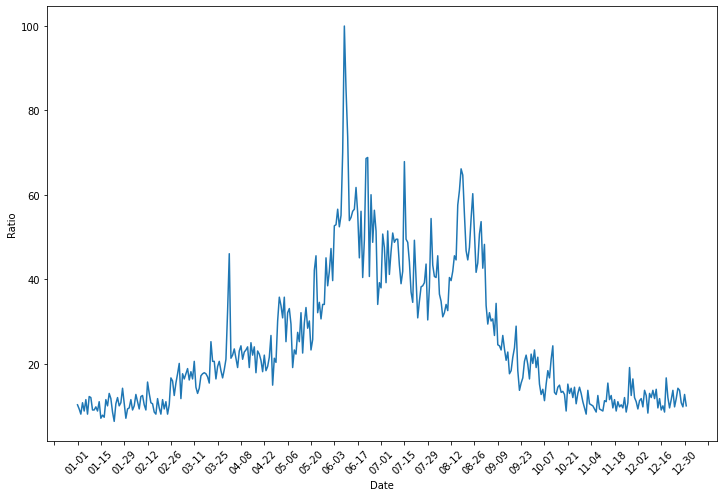

In [ ]:
plt.figure(figsize=(12,8))
ax = plt.axes()
ax.set_xlabel("Date")
ax.set_ylabel("Ratio")
ax.xaxis.set_major_locator(ticker.MultipleLocator(14))
plt.xticks(rotation=45)
plt.plot(res['period'],res['ratio'])
print(tt)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
temp = pd.read_csv('/content/drive/MyDrive/bigdata/2020temp.csv')

NameError: ignored

In [ ]:
temp

,date,temperature
0,2020-01-01,-2.2
1,2020-01-02,1.0
2,2020-01-03,-0.1
3,2020-01-04,1.2
4,2020-01-05,1.3
...,...,...
361,2020-12-27,5.8
362,2020-12-28,6.7
363,2020-12-29,0.1
364,2020-12-30,-10.9


기온


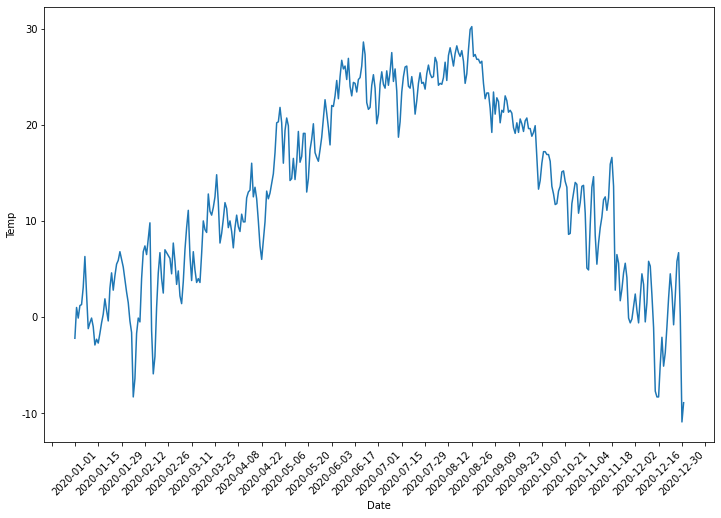

In [ ]:
plt.figure(figsize=(12,8))
ax = plt.axes()
ax.set_xlabel("Date")
ax.set_ylabel("Temp")
ax.xaxis.set_major_locator(ticker.MultipleLocator(14))
plt.xticks(rotation=45)
plt.plot(temp['date'],temp['temperature'])
print('기온')

In [ ]:
correlation = pd.concat([res['ratio'],temp['temperature']],axis = 1)
correlation

,ratio,temperature
0,10.29411,-2.2
1,9.31372,1.0
2,8.08823,-0.1
3,10.78431,1.2
4,8.82352,1.3
...,...,...
361,13.72549,5.8
362,10.78431,6.7
363,9.80392,0.1
364,12.74509,-10.9


In [ ]:
# 상관계수로 어느정도 관련성이 있는지 찾아냄 (공분산과 달리 둘다 -1~1 범위로 맞춰서 비교)
correlation.corr(method='pearson')

,ratio,temperature
ratio,1.000000,0.797377
temperature,0.797377,1.000000


In [ ]:
correlation.corr(method='pearson')['ratio']['temperature']

0.7973766934840425

In [ ]:
"""
corr_dict={}

corr_dict[keywords[0]]=[0,correlation.corr(method='pearson')['ratio']['temperature']]
corr_dict[keywords[4]]=[1,correlation.corr(method='pearson')['ratio']['temperature']]
corr_dict[keywords[3]]=[2,correlation.corr(method='pearson')['ratio']['temperature']]

corr_dict
"""

"\ncorr_dict={}\n\ncorr_dict[keywords[0]]=[0,correlation.corr(method='pearson')['ratio']['temperature']]\ncorr_dict[keywords[4]]=[1,correlation.corr(method='pearson')['ratio']['temperature']]\ncorr_dict[keywords[3]]=[2,correlation.corr(method='pearson')['ratio']['temperature']]\n\ncorr_dict\n"

In [ ]:
"""

#/content/correlation_csv_file.csv
import csv

with open('correlation_csv_file.csv','w') as f:
    w = csv.writer(f)
    w.writerow(corr_dict.keys())
    w.writerow(corr_dict.values())

"""

"\n\n#/content/correlation_csv_file.csv\nimport csv\n\nwith open('correlation_csv_file.csv','w') as f:\n    w = csv.writer(f)\n    w.writerow(corr_dict.keys())\n    w.writerow(corr_dict.values())\n\n"

In [ ]:
keyword = pd.read_csv('/content/drive/MyDrive/bigdata/keyword.txt')
keyword = keyword['더위']
keyword

0         더위 먹은 증상
1         더위크앤 리조트
2             더위사냥
3             더위 짤
4       더위 먹었을 때 약
           ...    
5600        여름 트레틀
5601      여름 트레이닝복
5602         여름 트루
5603        여름 티셔츠
5604         여름 특징
Name: 더위, Length: 5605, dtype: object

In [ ]:
keyword_set = []

for i in keyword:
  keyword_set.append(i.split(" "))

In [ ]:
keywords = []
for i in keyword_set:
  for j in i:
    keywords.append(j)
keywords[:10]

['더위', '먹은', '증상', '더위크앤', '리조트', '더위사냥', '더위', '짤', '더위', '먹었을']

In [ ]:
keywords = set(keywords)
keywords = list(keywords)

In [ ]:
print(len(keywords))
keywords[:5]

3121


['콤프레샤', '피라미', '장르소설마이너갤러리', '공포탐욕지수', 'mother']

In [ ]:
import os 
import sys 
import urllib.request 
import pandas as pd
import json

keywords = pd.read_csv("/content/drive/MyDrive/bigdata/keywords_set.csv")
keyword_set =[]
for key in keywords['0']:
  keyword_set.append(key)
len(keyword_set)

keywords = keyword_set

In [ ]:
client_id = "n3c5eOK1b5NsdDInuOM0" 
client_secret = "omwrqqdje4"

url = "https://openapi.naver.com/v1/datalab/search";


corr_dict={}
error_keywords={}
number = 1
temp = pd.read_csv('/content/drive/MyDrive/bigdata/2020temp.csv')

for i in keywords[2530:2900]:
  body = "{\"startDate\":\"2020-01-01\",\"endDate\":\"2020-12-31\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"" +str(i)+ "\",\"keywords\":[\"" +i+"\"]}]}";
  request = urllib.request.Request(url) 
  request.add_header("X-Naver-Client-Id",client_id) 
  request.add_header("X-Naver-Client-Secret",client_secret)
  request.add_header("Content-Type","application/json") 
  response = urllib.request.urlopen(request, data=body.encode("utf-8"))
  rescode = response.getcode() 

  if(rescode==200): 
    response_body = response.read() 
    print(i)
    # print(response_body.decode('utf-8')) 
  else: 
    print("Error Code:" + rescode) 

  data = json.loads(response_body)

  res = data['results'][0]['data'] 
  res = pd.DataFrame(res)

  try:
    correlation = pd.concat([res['ratio'],temp['temperature']],axis = 1)
  except:
    error_keywords[i]=number
    pass

  corr_dict[i]=[number,correlation.corr(method='pearson')['ratio']['temperature']]
  number = number+1
  # res.plot()

#/content/correlation_csv_file.csv
import csv

with open('correlation_csv_file.csv','w') as f:
    w = csv.writer(f)
    w.writerow(corr_dict.keys())
    w.writerow(corr_dict.values())

with open('error_keywords.csv','w') as f:
    w = csv.writer(f)
    w.writerow(corr_dict.keys())
    w.writerow(corr_dict.values())

소음
헬스
냉동
interpolation
동영상
처방
chrome
yf
차별
right
(hello
수면장애
라이언록
배관
molave
하우스
www.aka.ms.yourpc
la
더위송
미리내
수박게임
추움
계곡백숙
같이
가려움
스탠드
kg
ppt
트랜스폼
콘솔
면티
음식물쓰레기
파카
정화
logo
stroke
polynomial
명장면
하이큐
obs
위성사진
정속형
아역
실험
반팔셔츠
도깨비
먹어도
px
앱
yourgg
허브
세정제
ufo수첩
레오타드
피는
반팔티
장국영
tvn
더위크
세계
대본
색칠
onedrive
방역마스크
는데
청춘
태풍경로
글램핑
엄둔계곡
링거
글자
피해사례
드워프
옆
까지
반사
lake
한판맞고
인시디어스
카드뉴스
정인
환생
팝잇
초콜릿
당도
와이셔츠
xsmb
뻥
coc
디저트
한자어
낮잠
laine
ok
수박활동
want
theqoo.net
scipy
콘테나
송어
어원
code
hd
히터캡
무지개나라유치원
haveagoodtime
계획안
디자인
기초디자인
티어표
부족
javascript
백종원
palace
미술
무지개이미지
일본
불면
u트랩
polo
knot
안에서
긴바지
daikin
캘빈
현수막
무풍
케이블
이전설치
mp3
회전
숙제
티
나무에게로
재현
필요없는
편서풍
bhc
블로그
e학습터
으로
low
먹었을
심리테스트
watcha
qm3
sign
태블릿
별의
원숭이
세차
무지개떡
byc
유튜버
wii
thing
웹
보드게임
겨우리
반팔니트_spkwa25g49
간다
참새
뱀
관객수
방탄
두겹
먹방
스프레이
jpg
x트위치
귀마개
blue
안전
inverter
델타변이
아재
qm5
콧물
txt
studio
nasa
ani24
마크에이지4
모빌
비타민
유튜브
티셔츠
발명
u크루넥
단계
ac
메로나
bt21
manager
멀티
전화
outfit
에어리즘
장마시작
kompasu
humoruniv
교육
드라이클리닝
ladybug
오한
한자뜻
삼겹살
많이
케인인
타이레놀
아이템
열대야
색칠도안
일사병의
겨울왕국2
floyd
lpg
v넥


In [ ]:
corr_dict

{'(hello': [11, -0.11588491794748576],
 '20': [242, -0.15108167620167115],
 'ac': [191, 0.07845626420643682],
 'age': [295, -0.22004640004063683],
 'ani24': [182, 0.5791108894333475],
 'bbc': [287, -0.0594840315624734],
 'bhc': [138, -0.2851303417642597],
 'blackpink': [289, 0.22237285484323802],
 'bldc': [301, 0.556072421912721],
 'blue': [172, 0.25263886542901315],
 'boiling': [361, -0.1722562520597782],
 'bt21': [193, -0.12166142455259146],
 'byc': [153, 0.31832826313635154],
 'chrome': [7, 0.1547501661571314],
 'cnn': [281, -0.07083544608776482],
 'coc': [89, -0.18115211687786928],
 'code': [102, -0.0472510417968106],
 'daikin': [124, -0.367310599741972],
 'ebsi': [324, 0.09470990357683837],
 'eutech': [363, -0.0411781221147022],
 'examples': [234, 0.16306693081469184],
 'e학습터': [140, 0.22080913997894328],
 'floyd': [216, 0.12550098156182596],
 'full': [331, -0.1079665441402787],
 'groove': [227, 0.028537076295314087],
 'haveagoodtime': [106, -0.09831293224885351],
 'hd': [103, 0.1

In [ ]:
error_keywords

{'(hello': 11,
 'j의': 294,
 'kompasu': 200,
 'ufo수첩': 53,
 'ufo의': 284,
 '나무에게로': 134,
 '더위송': 19,
 '델타변이': 175,
 '먹었을': 143,
 '반팔니트_spkwa25g49': 160,
 '일사병의': 214,
 '코끝에': 343}

In [ ]:
with open('keywords_set.csv','w') as f:
    w = csv.writer(f)
    w.writerow(keywords)

NameError: ignored

In [ ]:
corr_dict = pd.DataFrame(corr_dict)
corr_dict.to_csv("correlation.csv",encoding='utf-8-sig')

In [ ]:
error_keywords = pd.DataFrame(error_keywords, index=[0])
error_keywords.to_csv("error_keywords.csv",encoding='utf-8-sig')

In [ ]:
keywords = pd.DataFrame(keywords)
keywords.to_csv("keywords_set.csv",encoding='utf-8-sig')

## 예측하기

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive/')

df = pd.read_csv('/content/drive/MyDrive/bigdata/five_year.csv')

Mounted at /content/drive/


In [2]:
df

,date,mosquito,watermelon,summer,ice,temperature
0,2016-01-03,21,4,10,10,6.5
1,2016-01-10,8,18,10,16,0.3
2,2016-01-17,4,7,12,0,1.7
3,2016-01-24,8,22,16,10,-14.4
4,2016-01-31,12,4,14,11,-3.9
...,...,...,...,...,...,...
256,2020-11-29,11,7,10,21,-0.6
257,2020-12-06,5,7,9,23,4.5
258,2020-12-13,12,7,13,14,-1.1
259,2020-12-20,7,21,10,36,-3.7


In [3]:
xdf = df.drop(['temperature','date'],axis=1)
xdf

,mosquito,watermelon,summer,ice
0,21,4,10,10
1,8,18,10,16
2,4,7,12,0
3,8,22,16,10
4,12,4,14,11
...,...,...,...,...
256,11,7,10,21
257,5,7,9,23
258,12,7,13,14
259,7,21,10,36


In [4]:
ydf = df['temperature']
ydf

0       6.5
1       0.3
2       1.7
3     -14.4
4      -3.9
       ... 
256    -0.6
257     4.5
258    -1.1
259    -3.7
260     5.8
Name: temperature, Length: 261, dtype: float64

In [5]:
xdf = np.array(xdf)
ydf = np.array(ydf)
ydf = ydf.reshape(-1,1)

In [6]:
ydf[0]

array([6.5])

In [7]:
xdf[0]

array([21,  4, 10, 10])

In [8]:
xdf.shape

(261, 4)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xdf , ydf , test_size=0.1 , random_state = 0)

In [10]:
# 정규화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_train,y_train)

PolynomialFeatures()

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly,y_train)
model.score(X_poly,y_train)

0.7641369408464633

In [13]:
model.score(poly.fit_transform(X_test),y_test)

0.6067582327858043

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive/')

df = pd.read_csv('/content/drive/MyDrive/bigdata/this_year.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [15]:
xdf = df.drop(['temperature','date'],axis=1)
ydf = df['temperature']

xdf = np.array(xdf)
ydf = np.array(ydf)
ydf = ydf.reshape(-1,1)

In [19]:
xdf[0]

array([18, 13,  5, 17])

In [18]:
ydf[0]

array([-4.93333333])

In [22]:
xdf = sc.fit_transform(xdf)
pred_xdf = model.predict(poly.fit_transform(xdf))

In [23]:
pred_xdf

array([[ 2.87148933],
       [ 3.20140936],
       [-0.47869973],
       [ 6.08151473],
       [ 0.95678691],
       [ 1.97398506],
       [ 3.25143996],
       [ 5.0903187 ],
       [ 7.99734688],
       [ 0.15627977],
       [ 6.12738076],
       [ 4.20714969],
       [ 6.94366956],
       [ 8.05141526],
       [ 7.29866784],
       [13.71806767],
       [ 8.93625189],
       [11.92939346],
       [15.90779984],
       [20.25754753],
       [21.31245544],
       [22.45973907],
       [25.54529579],
       [24.02898511],
       [60.53742468],
       [24.13816763],
       [26.23619238],
       [26.500972  ],
       [28.44573578],
       [34.62235446],
       [26.63664774],
       [22.47457061],
       [19.53496171],
       [22.91235441],
       [18.02329734],
       [20.71609705],
       [18.90203935],
       [22.75712602],
       [19.98682679],
       [24.01269792],
       [22.47602183],
       [ 7.44321875],
       [10.87705986],
       [ 9.44383756],
       [12.03085414],
       [12

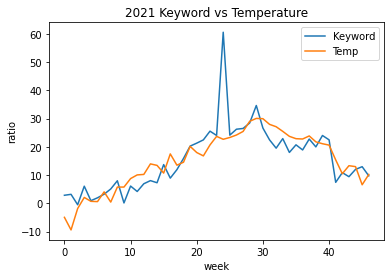

In [32]:
import matplotlib.pyplot as plt
plt.title("2021 Keyword vs Temperature")
plt.plot(pred_xdf,label='Keyword')
plt.plot(ydf,label='Temp')
plt.xlabel("week")
plt.ylabel("ratio")
plt.legend()

# 합치는 시도

In [59]:
rate = np.array([3,3,12,1])/np.array([19]) # 모기 수박 여름 빙수 3:3:12:1
rate

array([0.15789474, 0.15789474, 0.63157895, 0.05263158])

In [61]:
X_rate = xdf*rate
X_rate

array([[3.31578947, 0.63157895, 6.31578947, 0.52631579],
       [1.26315789, 2.84210526, 6.31578947, 0.84210526],
       [0.63157895, 1.10526316, 7.57894737, 0.        ],
       ...,
       [1.89473684, 1.10526316, 8.21052632, 0.73684211],
       [1.10526316, 3.31578947, 6.31578947, 1.89473684],
       [1.42105263, 1.42105263, 7.57894737, 1.10526316]])

In [65]:
X_sum_rate = []

for item in X_rate:
  sum = 0
  for i in item:
    sum += i
  X_sum_rate.append(sum)
X_sum_rate = np.array(X_sum_rate)
X_sum_rate = X_sum_rate.reshape(-1,1)
X_sum_rate.shape

(261, 1)

In [68]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_sum_rate,ydf)
model.score(X_sum_rate,ydf)

0.5494308231376139

# 실패한시도

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=4))  # input_dim=3 gives multi-variable regression
model.add(tf.keras.layers.Activation('linear'))  # this line can be omitted, as linear activation is default

model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=0.00001))
model.summary()

history = model.fit(X_train, y_train, epochs=1000)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
8/8 [==============================] - 0s 2ms/step - loss: 1220.1818
Epoch 2/1000
8/8 [==============================] - 0s 2ms/step - loss: 388.3334
Epoch 3/1000
8/8 [==============================] - 0s 2ms/step - loss: 170.8257
Epoch 4/1000
8/8 [==============================] - 0s 2ms/step - loss: 113.5387
Epoch 5/1000
8/8 [==============================] - 0s 2ms/step - loss: 101.1712
Epoch 6/1000
8/8 [==============================] - 

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.3,normalize=True)
lasso.fit(X_train,y_train)
lasso.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


0.22226813318611838

In [ ]:
ridge.score(X_test,y_test)

0.49487258159748093

In [ ]:
model.predict(X_test)

array([[ 2.761764 ],
       [ 7.9658484],
       [28.11659  ],
       [26.920675 ],
       [ 6.496571 ],
       [ 6.205219 ],
       [ 7.0331173],
       [10.584012 ],
       [ 9.330842 ],
       [ 8.783738 ],
       [23.201117 ],
       [ 4.3399057],
       [ 7.097733 ],
       [ 5.817433 ],
       [ 8.484715 ],
       [ 9.02762  ],
       [27.863943 ],
       [ 7.012014 ],
       [10.992097 ],
       [14.452033 ],
       [ 5.659229 ],
       [ 5.378948 ],
       [ 2.8845704],
       [11.448153 ],
       [ 8.339384 ],
       [ 5.992115 ],
       [20.965384 ]], dtype=float32)

In [ ]:
y_test

array([10.1,  0.6, 24.9, 24.3, 11. ,  9.6,  0.7, 15.7, 23.5, -7.2, 21.6,
       -8.3,  1.5, -6.1,  8.2, 14.4, 24. ,  5.6, 28.2, 16.4,  5.5, -0.6,
        2.3, 11.1, 14.7, -6.8, 29.8])